### Basic Steps to Explore Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(color_codes=True)
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score

sns.set(color_codes=True)

import glob
import os

import datetime
sns.set()

In [2]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [3]:
#df.info()

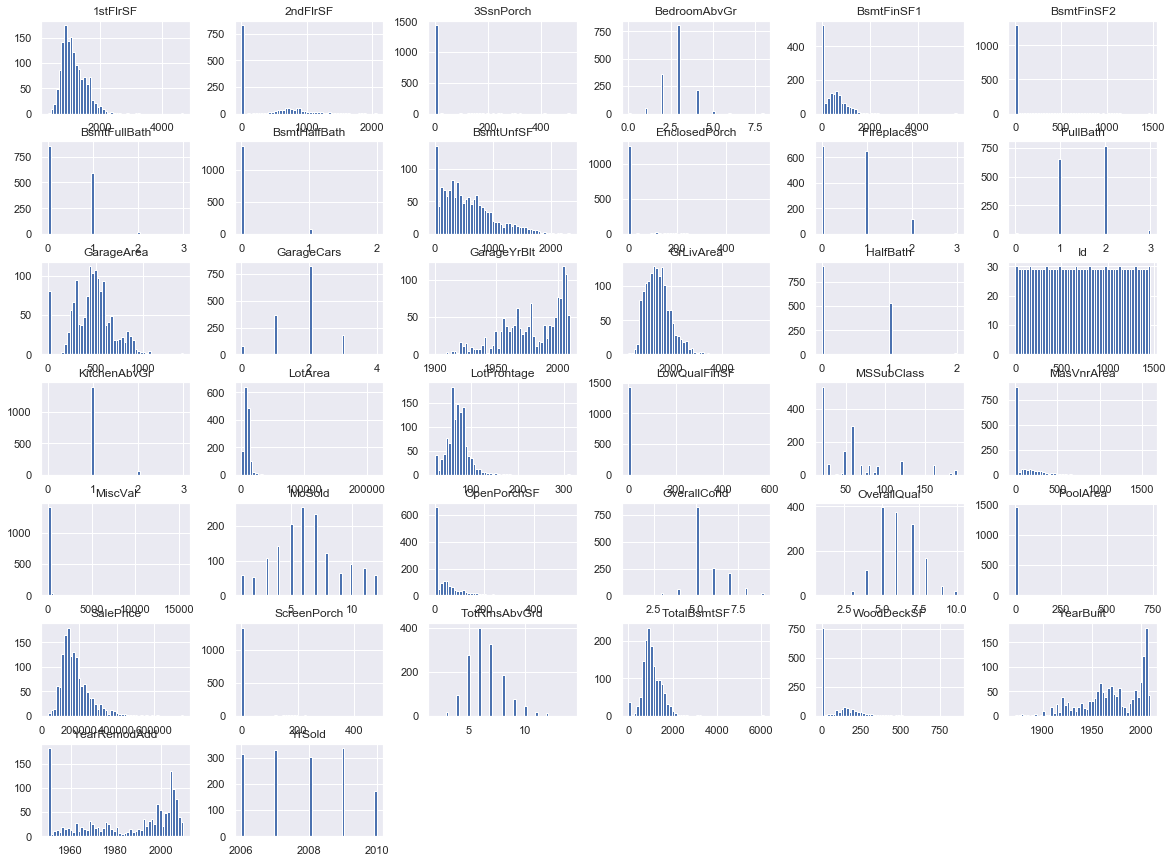

In [3]:
# Quick overview of all numeric variables of the data

df.hist(bins=50, figsize=(20,15))
plt.show()

In [36]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

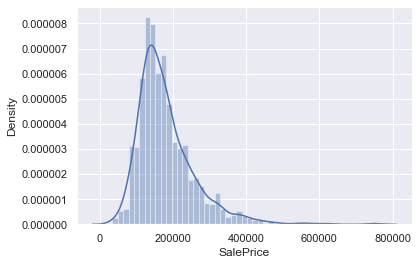

In [37]:
sns.distplot(df['SalePrice'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


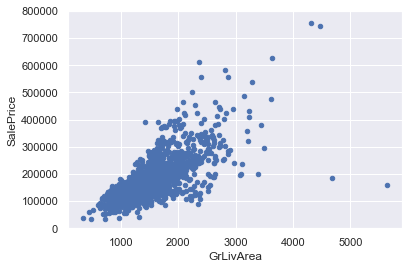

In [42]:
data = df[['SalePrice','GrLivArea']]
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0, 800000)

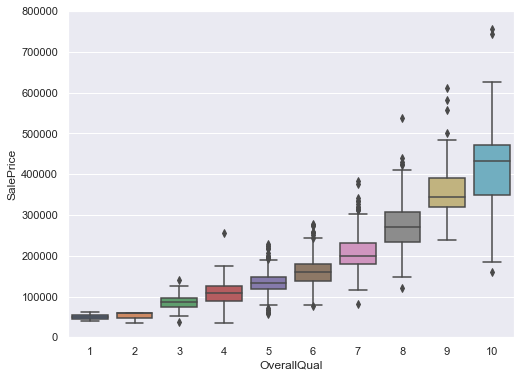

In [43]:
# Relationship with categorical features
f, ax = plt.subplots(figsize=(8, 6))
data = df[['SalePrice','OverallQual']]
fig = sns.boxplot(x='OverallQual', y='SalePrice', data = data)
fig.axis(ymin=0,ymax=800000)


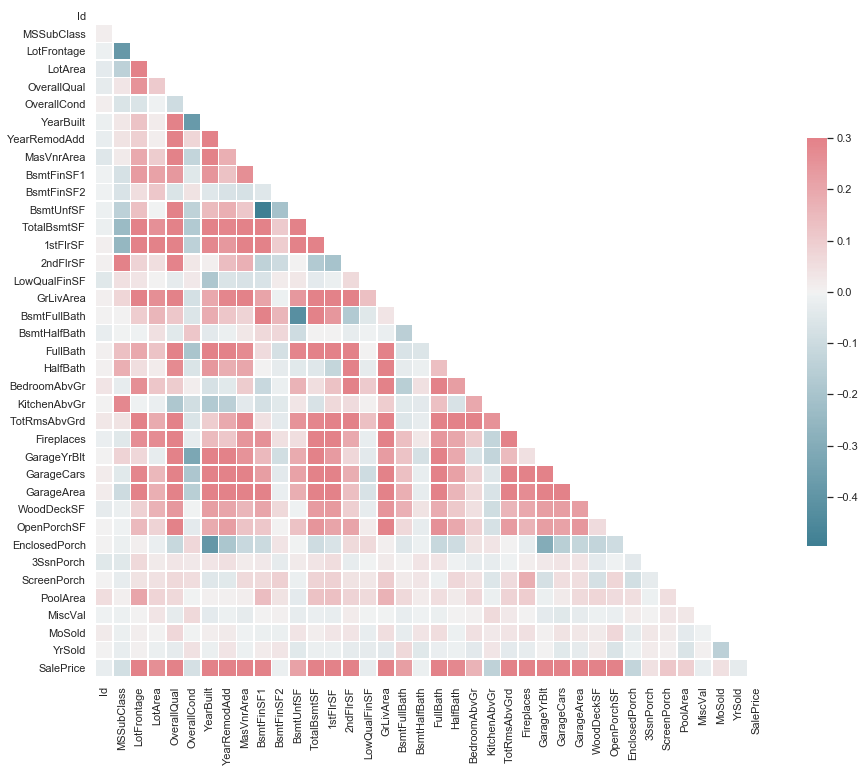

In [51]:
#correlation matrix
sns.set(style="white")

# Compute the correlation matrix
corrmat = df.corr() # corr calculation

# Simplest way: 
# sns.heatmap(corrmat, vmax=.8, square=True);

# Create a white mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, mask=mask, 
            cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

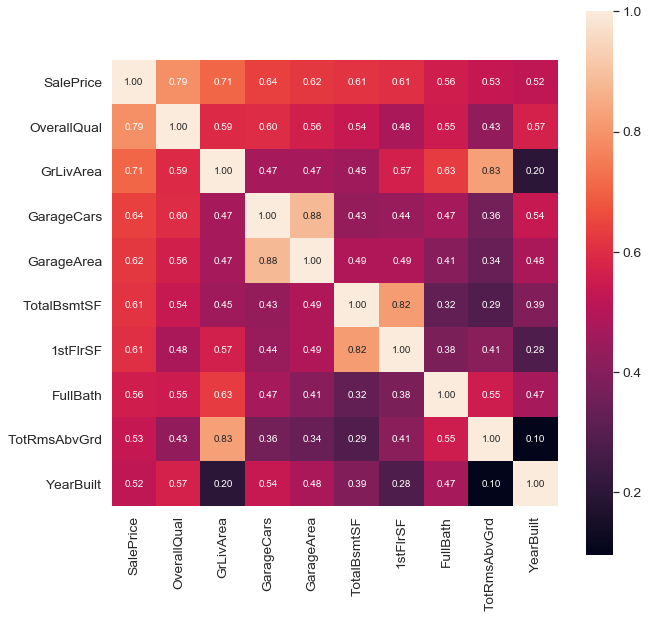

In [46]:
#saleprice correlation matrix
f, ax = plt.subplots(figsize=(10, 10))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

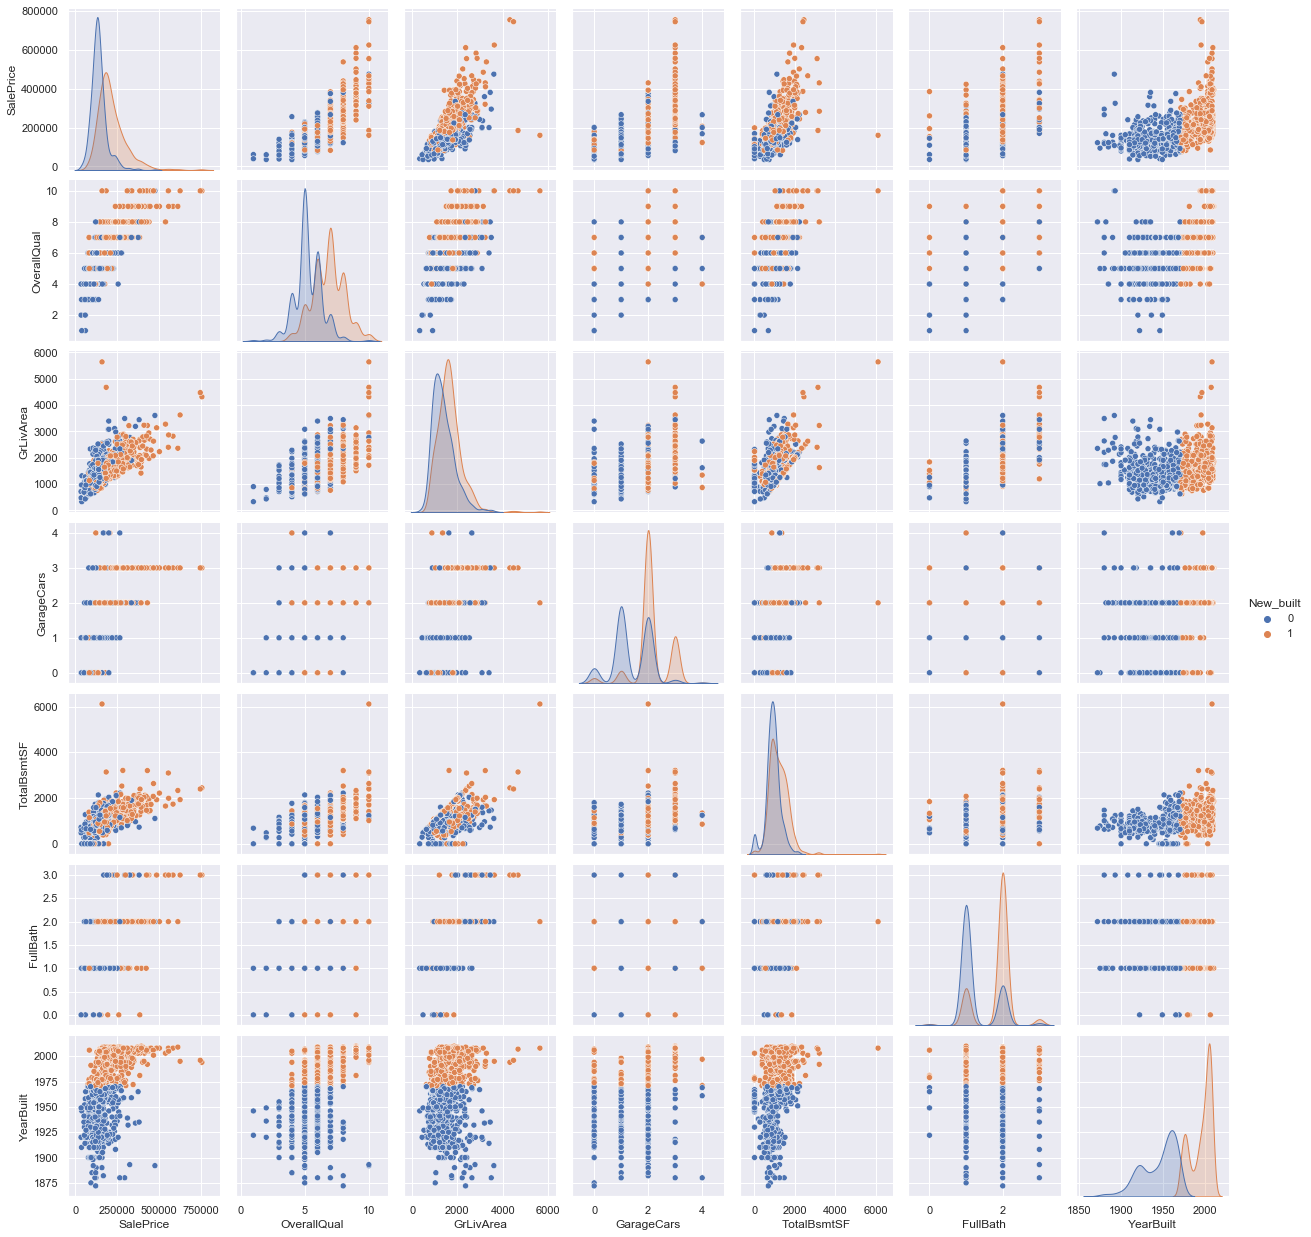

In [145]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','New_built']
sns.pairplot(df[cols], size = 2.5, hue='New_built')
plt.show();

In [67]:
df['FullBath'].value_counts()

2    767
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [141]:
df['New_built'] = [1 if x > 1970 else 0 for x in df['YearBuilt']]

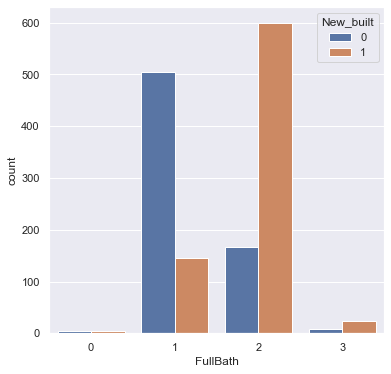

In [72]:
f, ax = plt.subplots(figsize=(6, 6))
data=df[['FullBath','New_built']]
sns.countplot(x='FullBath', hue='New_built', data=data)

In [77]:
df[['FullBath', 'New_built']].groupby('FullBath').count() #mean() sum()

,New_built
FullBath,
0,9
1,650
2,767
3,33


In [ ]:
# Convert categorical data letter to number
# df['col'].apply(LabelEncoder().fit_transform)


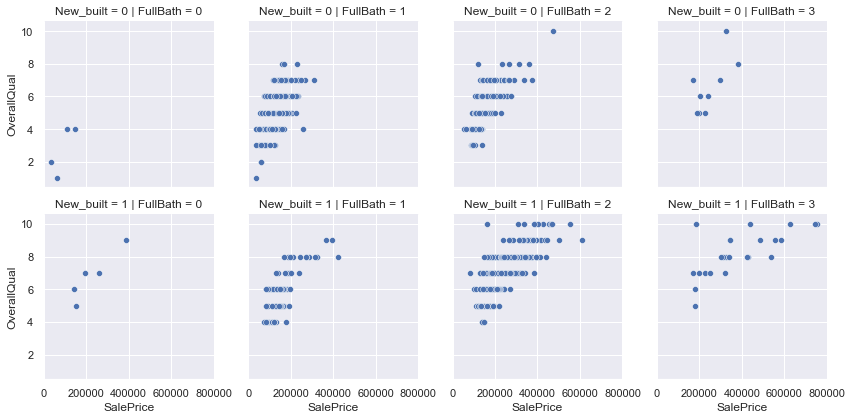

In [78]:
g = sns.FacetGrid(df, col="FullBath",  row="New_built")
g.map(sns.scatterplot, "SalePrice", "OverallQual")

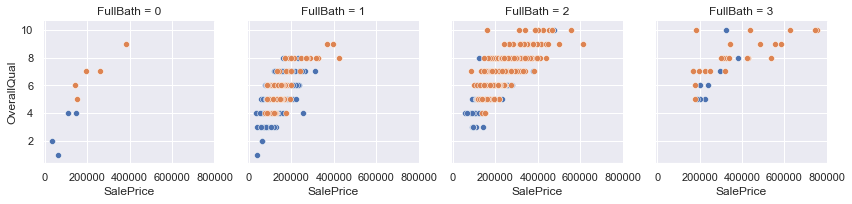

In [82]:
g = sns.FacetGrid(df, col="FullBath",  hue="New_built")
g.map(sns.scatterplot, "SalePrice", "OverallQual")

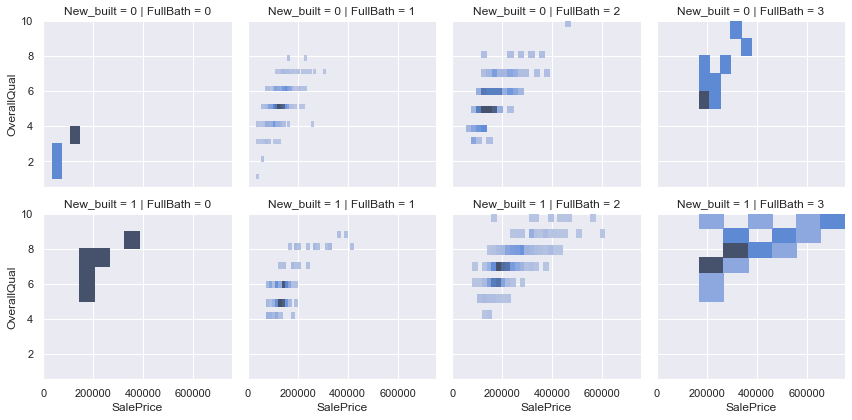

In [79]:
g = sns.FacetGrid(df, col="FullBath",  row="New_built")
g.map(sns.histplot, "SalePrice", "OverallQual")

## Missing Data

In [57]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(2)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014


In [58]:
df = df.drop((missing_data.loc[missing_data['Total'] > 1]).index,axis = 1) #drop column name
df= df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum()

# Fill with median:
# median = df['col1'],median()
# df['col1'].fillna(median, inplace = True)

# Or Using SimpleImputer for all numeric vars:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(df_num)
X = imputer.transform(df_num)
df_tran = pd.DataFrame(X, columns = df_num.columns)

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 63, dtype: int64

In [61]:
df.nlargest(2, 'SalePrice')['SalePrice']

691     755000
1182    745000
Name: SalePrice, dtype: int64

In [ ]:
# extract month, weekday, and hour information
data['month'] = data['date'].apply(lambda x: x.month)

In [146]:
df = pd.read_csv('Pokemon.csv',index_col=0,encoding= 'unicode_escape')

In [147]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
Sp. Atk      151 non-null int64
Sp. Def      151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 19.3+ KB


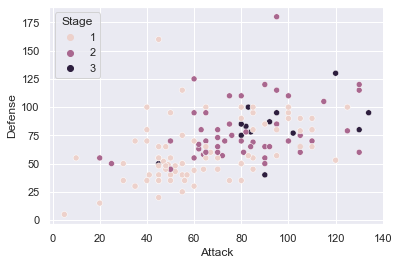

In [95]:
sns.scatterplot(x='Attack',y='Defense',hue='Stage', data=df)

(0, 140)

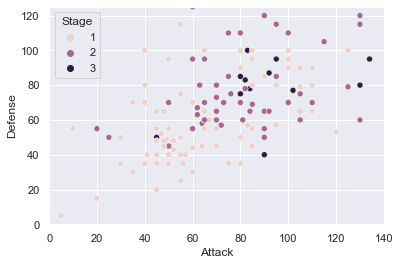

In [97]:
# Plot using Seaborn
sns.scatterplot(x='Attack', y='Defense', data=df, hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, 125)
plt.xlim(0, 140)

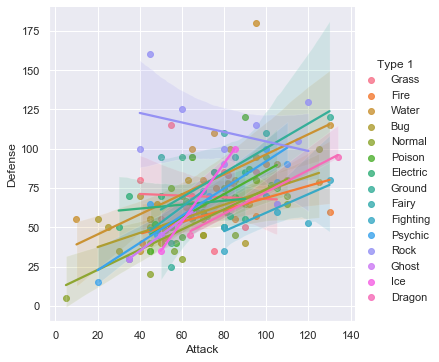

In [94]:
sns.lmplot(x='Attack',y='Defense',hue='Type 1', data=df)

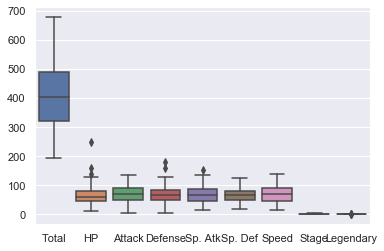

In [98]:
# Boxplot
sns.boxplot(data=df)

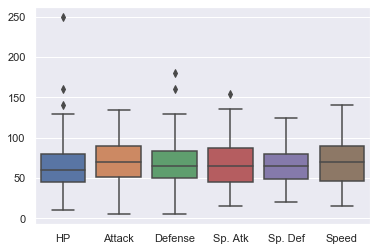

In [99]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

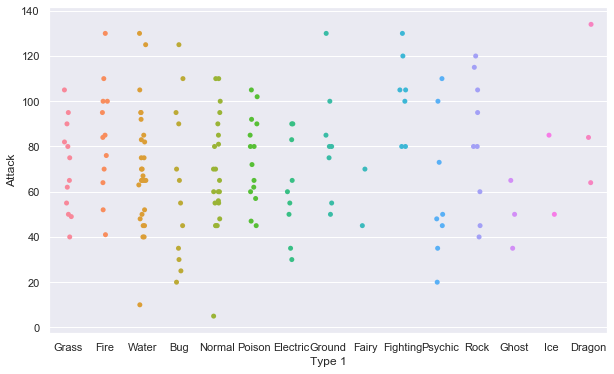

In [130]:
f.ax = plt.subplots(figsize =(10,6))
sns.stripplot(x='Type 1', y='Attack', data=df)

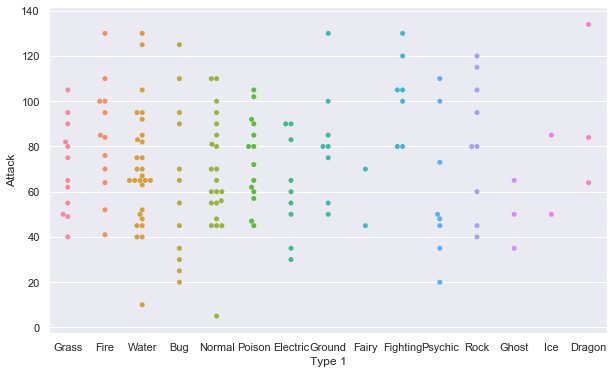

In [133]:
# Swarm plot with Pokemon color palette (Swarm is Strip + Distribution)
f.ax = plt.subplots(figsize =(10,6))
sns.swarmplot(x='Type 1', y='Attack', data=df)

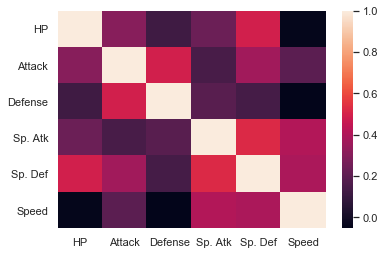

In [134]:
corr = stats_df.corr()
sns.heatmap(corr)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

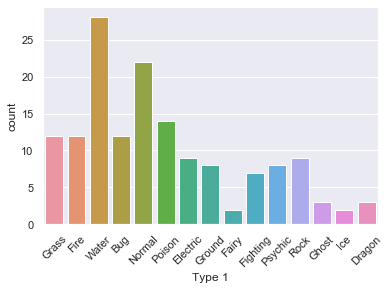

In [109]:
sns.countplot(x='Type 1', data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

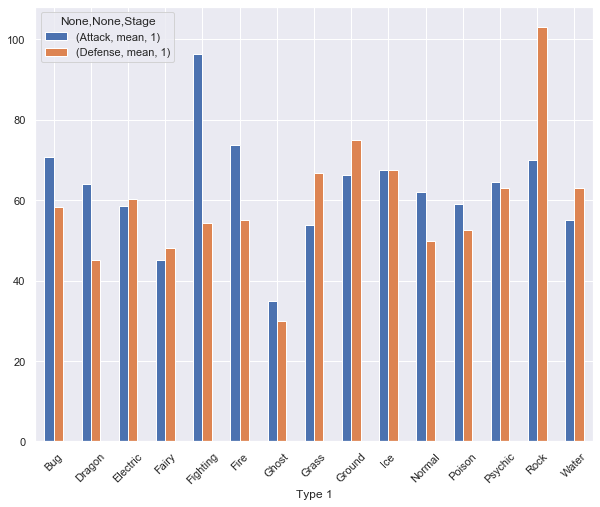

In [154]:
# Pivot table
#pd.pivot_table().plot(kind='bar') 
pd.pivot_table(df,
              index=['Type 1'],
              values = ['Attack','Defense'],
              columns = ['Stage'],
              fill_value='',
              aggfunc = {'mean'},
              #margins=True,
              #margins_name = 'Average'
              ).plot(kind='bar', figsize = (10,8)) 
plt.xticks(rotation = 45)

In [155]:
pd.pivot_table(df,
              index=['Type 1'],
              values = ['Attack','Defense'],
              columns = ['Stage'],
              fill_value='',
              aggfunc = {'mean'},
              #margins=True,
              #margins_name = 'Average'
              )

Attack                    Defense                  
               mean                       mean                  
Stage             1        2     3           1        2        3
Type 1                                                          
Bug       70.833333    51.25  67.5   58.333333    61.25       45
Dragon    64.000000       84   134   45.000000       65       95
Electric  58.600000    66.25         60.400000       70         
Fairy     45.000000       70         48.000000       73         
Fighting  96.250000    102.5   130   54.250000       65       80
Fire      73.833333       96    84   55.000000     68.6       78
Ghost     35.000000       50    65   30.000000       45       60
Grass     53.800000       78    89   66.800000       67  77.6667
Ground    66.250000     97.5         75.000000     97.5         
Ice       67.500000                  67.500000                  
Normal    61.933333  80.1667    80   49.866667  59.1667       75
Poison    59.000000  82.3333    97   52.666667  76.3333       82
Psychic   64.600000       54    50   63.000000       50       45
Rock      70.000000       90   120  103.000000      115      130
Water     55.153846  82.4615    89   62.923077       89     97.5

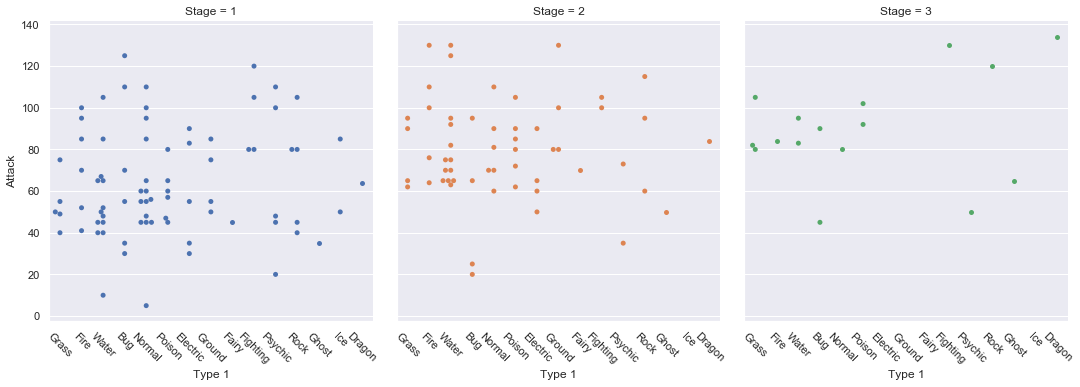

In [112]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

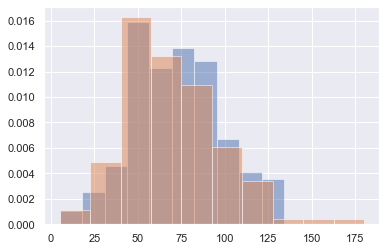

In [120]:
columns=['Attack', 'Defense']
data = df[columns]

for col in columns:
    plt.hist(data[col], normed=True, alpha=0.5)

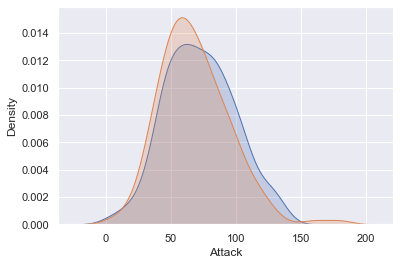

In [122]:
for col in columns:
    sns.kdeplot(data[col], shade=True)

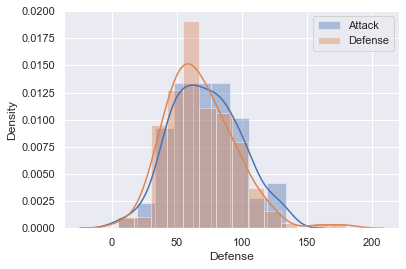

In [126]:
sns.distplot(df['Attack'], label='Attack')
sns.distplot(df['Defense'], label='Defense')
plt.legend()
plt.show()

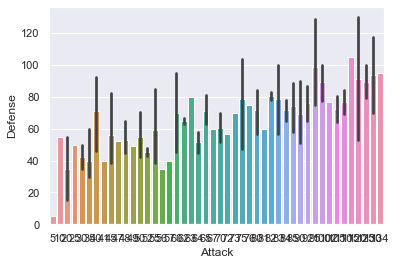

In [128]:
sns.barplot(x=df['Attack'], y=df['Defense'])

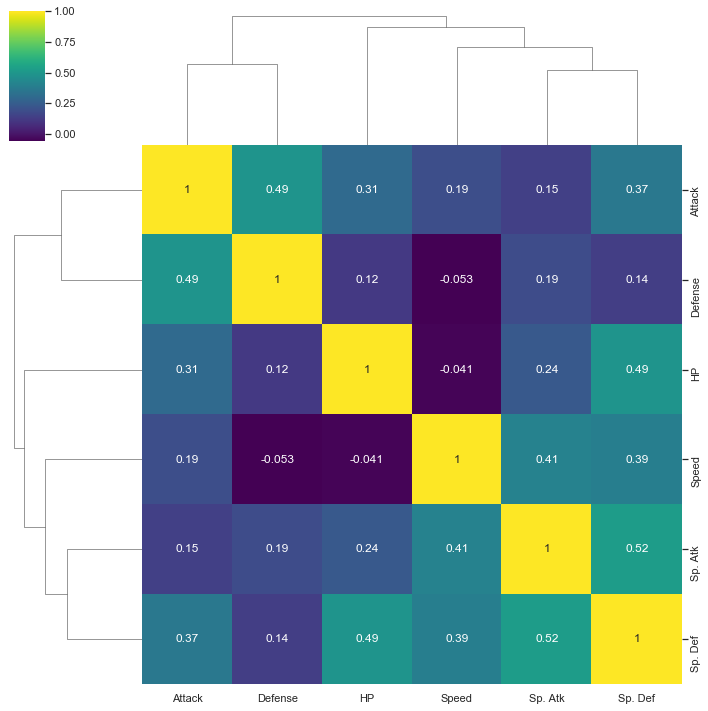

In [137]:
#Cluster maps use Hierarchical clustering to form different clusters.
sns.clustermap(corr,annot=True,cmap='viridis')

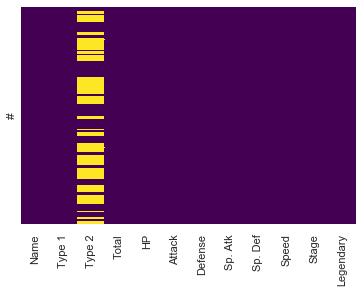

In [138]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Machine Learning

In [ ]:
X=df_ml.drop(columns = 'tip_20')
Y=df_ml['tip_20']

In [ ]:
# Keep the ratio of different tip_20
x_train,x_test,y_train, y_test = train_test_split(X, Y, stratify = Y)
y_train.value_counts()/y_train.shape[0]*100

In [ ]:
# Double check if the ratio of two classes is still the same
df['tip_20'].value_counts()

## Decision Tree

In [ ]:
#Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced') 
dt.fit(x_train,y_train)
print('Decision Tree train score',dt.score(x_train,y_train))
print('Decision Tree test score',dt.score(x_test,y_test))

# List of the most 15 important features
feature_importance = dict(zip(x_train.columns,dt.feature_importances_))
sorted(feature_importance.items(), key=lambda item:item[1], reverse = True)[:15]

# Bar graph of most important features
df_fi = pd.DataFrame(dt.feature_importances_, index = x_train.columns,columns=['feature_importance']).sort_values('feature_importance', ascending=False)
df_fi.iloc[:10,:].T.plot(kind='bar')

# Draw the tree, limit to 5 levels for easy intepretation
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file="tree.dot",max_depth=5,feature_names = x_train.columns)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=50,max_depth=20,class_weight='balanced')
rf.fit(x_train,y_train)
print('Random Forest train score',rf.score(x_train,y_train))
print('Random Forest test score',rf.score(x_test,y_test))

# Added Stratified Cross Validation

scores = cross_val_score(rf, x_train, y_train, cv=5)
print('RF with CV = 5: ',scores)

In [ ]:
# Confusion Matrix
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred)

## Logistic Regression

In [ ]:
# Logistic Regression
lr = LogisticRegression() 
lr.fit(x_train,y_train)
print('Logistic Regression train score',lr.score(x_train,y_train))
print('Logistic Regression test score',lr.score(x_test,y_test))

#Coef
fi = lr.coef_[0]
df_fi = pd.DataFrame(fi, columns=['coef'], index = x_train.columns).sort_values('coef', ascending=False)
df_fi 

# Calculating the odd that an observation is in class 1 given the values of its X variables. 
# I don't find it easy to inteprete this result
fi = np.exp(lr.coef_[0])
df_fi = pd.DataFrame(fi, columns=['odds'], index = x_train.columns).sort_values('odds', ascending=False)
df_fi 

### Cross Validation 5-fold and Accuracy Score

In [ ]:
# Cross Validation 5-fold and Accuracy Score
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(lr, x_train, y_train, cv=5)
scores

## Linear Regression

In [ ]:
lr = LinearRegression(normalize=True) 
lr.fit(x_train,y_train)

In [ ]:
lr.coef_
lr.intercept_

In [ ]:
# Regression Metrics
# Mean ABS Error
from sklearn.metrics import mean_absolute_error
y_true = y_test #actual value
mean_absolute_error(y_true, y_pred)

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

#R2 Score
from sklearn.metrics import e2_score
r2_score(y_true, y_pred)


In [ ]:
#Format all number in a df

import pandas as pd
pd.options.display.float_format = '${:,.2f}'.format
df = pd.DataFrame([123.4567, 234.5678, 345.6789, 456.7890],
                  index=['foo','bar','baz','quux'],
                  columns=['cost'])
print(df)

# Format each column
df.style.format({'Percentage':'{:,.2f}%'})